## **Analyzing the CSV file**


In [ ]:
#Importing the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy.stats import pearsonr
import random

In [ ]:
#Connecting to the Google drive account where data is stored
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/

Mounted at /content/drive
/content/drive/MyDrive


In [ ]:
#Reading the csv file for analysis
artist_df = pd.read_csv('artists.csv')

In [ ]:
#Initial structure of the data
print('The columns in the file are', artist_df.columns.tolist())
print('The dimensions of the artists dataframe are',artist_df.shape)
print('A sample look at the dataframe: ')
artist_df.sample(5)

The columns in the file are ['id', 'name', 'years', 'genre', 'nationality', 'bio', 'wikipedia', 'paintings']
The dimensions of the artists dataframe are (50, 8)
A sample look at the dataframe: 


,id,name,years,genre,nationality,bio,wikipedia,paintings
47,47,Raphael,1483 – 1520,High Renaissance,Italian,Raffaello Sanzio da Urbino (Italian: [raffaˈɛl...,https://en.wikipedia.org/wiki/Raphael,109
33,33,Henri de Toulouse-Lautrec,1864 – 1901,Post-Impressionism,French,Henri Marie Raymond de Toulouse-Lautrec-Monfa ...,https://en.wikipedia.org/wiki/Henri_de_Toulous...,81
24,24,Sandro Botticelli,1445 - 1510,Early Renaissance,Italian,"Alessandro (c. 1445 – May 17, 1510), known as ...",http://en.wikipedia.org/wiki/Sandro_Botticelli,164
40,40,Henri Rousseau,1844 – 1910,Primitivism,French,Henri Julien Félix Rousseau (French: [ɑ̃ʁi ʒyl...,https://en.wikipedia.org/wiki/Henri_Rousseau,70
7,7,Andrei Rublev,1360 - 1430,Byzantine Art,Russian,"Andrei Rublev (Russian: Андре́й Рублёв, IPA: [...",http://en.wikipedia.org/wiki/Andrei_Rublev,99


In [ ]:
#Removing all the redundant columns in the dataframe
artist_df.drop(["id","bio","wikipedia"],axis=1,inplace=True)
print('The dimensions of the artists dataframe are',artist_df.shape)
artist_df.sample(5)

The dimensions of the artists dataframe are (50, 5)


,name,years,genre,nationality,paintings
36,William Turner,1775 - 1851,Romanticism,British,66
23,Giotto di Bondone,1266 - 1337,Proto Renaissance,Italian,119
4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,194
49,Jackson Pollock,1912 – 1956,Abstract Expressionism,American,24
33,Henri de Toulouse-Lautrec,1864 – 1901,Post-Impressionism,French,81


In [ ]:
#Renaming the column names for uniformity
artist_df.rename(columns={'name':'Name',
                          'years':'Years',
                          'genre':'Genre',
                          'nationality':'Nationality',
                          'paintings':'Num_paintings',}, inplace=True)
artist_df.sample(5)

,Name,Years,Genre,Nationality,Num_paintings
4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,194
26,Leonardo da Vinci,1452 - 1519,High Renaissance,Italian,143
11,Kazimir Malevich,1879 - 1935,Suprematism,Russian,126
29,Jan van Eyck,1395 - 1441,Northern Renaissance,Flemish,81
32,Titian,1488 - 1576,"High Renaissance,Mannerism",Italian,255


In [ ]:
print('The number of artists in the file are',artist_df['Name'].nunique())
print('The total number of paintings are', artist_df['Num_paintings'].sum())

The number of artists in the file are 50
The total number of paintings are 8446


In [ ]:
max_paintings = artist_df['Num_paintings'].max()
min_paintings = artist_df['Num_paintings'].min()
max_artist_name = artist_df.loc[artist_df['Num_paintings'] == max_paintings, 'Name'].values[0]
min_artist_name = artist_df.loc[artist_df['Num_paintings'] == min_paintings, 'Name'].values[0]
print('The artist with the highest number of paintings is', max_artist_name , 'with' , max_paintings , 'paintings')
print('The artist with the least number of paintings is', min_artist_name, 'with', min_paintings,  'paintings')
print('The avergae number of paintings done by an artist is',artist_df['Num_paintings'].mean())

The artist with the highest number of paintings is Vincent van Gogh with 877 paintings
The artist with the least number of paintings is Jackson Pollock with 24 paintings
The avergae number of paintings done by an artist is 168.92


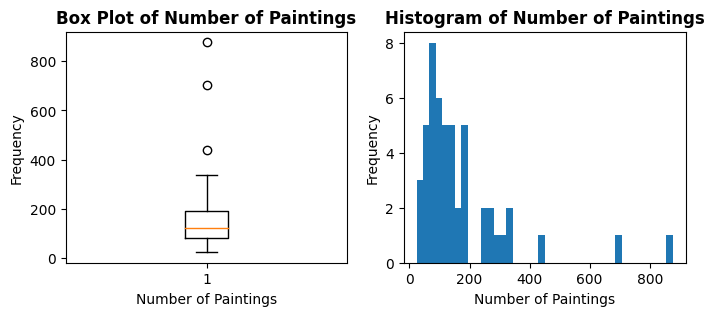

In [ ]:
# Set figure size and create subplots
fig, axs = plt.subplots(ncols=2, figsize=(8, 3))

# Create box plot
axs[0].boxplot(artist_df['Num_paintings'])
axs[0].set_xlabel('Number of Paintings')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Box Plot of Number of Paintings', fontweight='bold', fontsize=12)

# Create histogram
axs[1].hist(artist_df['Num_paintings'], bins=40)
axs[1].set_xlabel('Number of Paintings')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram of Number of Paintings', fontweight='bold', fontsize=12)

# Show the plots
plt.show()

In [ ]:
num_paintings = artist_df['Num_paintings']
q1 = np.percentile(num_paintings, 25)
q3 = np.percentile(num_paintings, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = num_paintings[(num_paintings < lower_bound) | (num_paintings > upper_bound)]
outlier_artists = artist_df[artist_df['Num_paintings'].isin(outliers)]
print("Outlier artists:", list(outlier_artists['Name']))

Outlier artists: ['Vincent van Gogh', 'Pablo Picasso', 'Edgar Degas']


In [ ]:
artist_df_year = pd.DataFrame(artist_df.Years.str.split(' ',2).tolist(),columns = ['Birth','-','Death'])
artist_df_year.drop(["-"],axis=1,inplace=True)
artist_df["Birth"]=artist_df_year.Birth
artist_df["Death"]=artist_df_year.Death
artist_df.drop(["Years"],axis=1,inplace=True)
artist_df.sample(5)

<ipython-input-11-a93fad54d497>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  artist_df_year = pd.DataFrame(artist_df.Years.str.split(' ',2).tolist(),columns = ['Birth','-','Death'])


,Name,Genre,Nationality,Num_paintings,Birth,Death
28,Henri Matisse,"Impressionism,Post-Impressionism",French,186,1869,1954
12,Mikhail Vrubel,Symbolism,Russian,171,1856,1910
25,Caravaggio,Baroque,Italian,55,1571,1610
36,William Turner,Romanticism,British,66,1775,1851
23,Giotto di Bondone,Proto Renaissance,Italian,119,1266,1337


In [ ]:
def calculate_age(row):
    return int(row['Death']) - int(row['Birth'])

artist_df['Age'] = artist_df.apply(lambda row: calculate_age(row), axis=1)
artist_df.sample(5)

,Name,Genre,Nationality,Num_paintings,Birth,Death,Age
6,Edouard Manet,"Realism,Impressionism",French,90,1832,1883,51
43,Piet Mondrian,Neoplasticism,Dutch,84,1872,1944,72
37,Edvard Munch,"Symbolism,Expressionism",Norwegian,67,1863,1944,81
8,Vincent van Gogh,Post-Impressionism,Dutch,877,1853,1890,37
26,Leonardo da Vinci,High Renaissance,Italian,143,1452,1519,67


In [ ]:
min_age = artist_df['Age'].min()
max_age = artist_df['Age'].max()
print('The minimum age in the file is', min_age)
print('The maximum age in the file is', max_age)

The minimum age in the file is 32
The maximum age in the file is 98


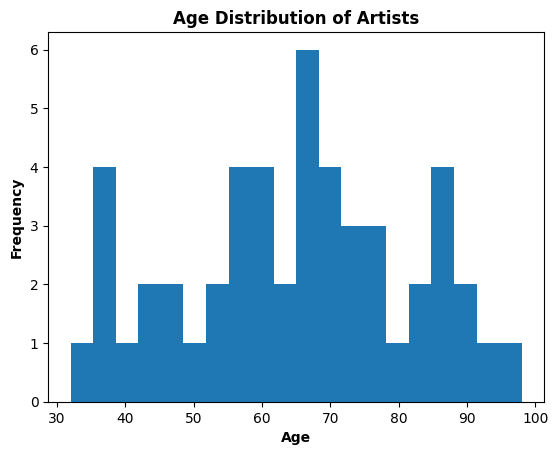

In [ ]:
artist_df['Age'].hist(bins=20, grid=False)
plt.title('Age Distribution of Artists', fontweight='bold')
plt.xlabel('Age', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.show()

In [ ]:
def label_age_group(age):
    if age >= min_age and age <= 40:
        return 'Thirties'
    elif age > 40 and age <= 50:
        return 'Fourties'
    elif age > 50 and age <= 60:
        return 'Fifties'
    elif age > 60 and age <= 70:
        return 'Sixties'
    elif age > 70 and age <= 80:
        return 'Seventies'
    elif age > 80 and age <= 90:
        return 'Eighties'
    elif age > 90 and age <= max_age:
        return 'Ninties'
    else:
        return 'Unknown'

In [ ]:
artist_df['Age_Group'] = artist_df.apply(lambda row: label_age_group(row['Age']), axis=1)

In [ ]:
artist_df.sample(10)

,Name,Genre,Nationality,Num_paintings,Birth,Death,Age,Age_Group
41,Georges Seurat,Post-Impressionism,French,43,1859,1891,32,Thirties
27,Diego Velazquez,Baroque,Spanish,128,1599,1660,61,Sixties
15,Pierre-Auguste Renoir,Impressionism,French,336,1841,1919,78,Seventies
31,Rembrandt,Baroque,Dutch,262,1606,1669,63,Sixties
8,Vincent van Gogh,Post-Impressionism,Dutch,877,1853,1890,37,Thirties
30,Edgar Degas,Impressionism,French,702,1834,1917,83,Eighties
23,Giotto di Bondone,Proto Renaissance,Italian,119,1266,1337,71,Seventies
12,Mikhail Vrubel,Symbolism,Russian,171,1856,1910,54,Fifties
38,Paul Cezanne,Post-Impressionism,French,47,1839,1906,67,Sixties
11,Kazimir Malevich,Suprematism,Russian,126,1879,1935,56,Fifties


<ipython-input-19-d860bca6a0ed>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  num_paintings_age_group = artist_df.groupby('Age_Group').sum()['Num_paintings']


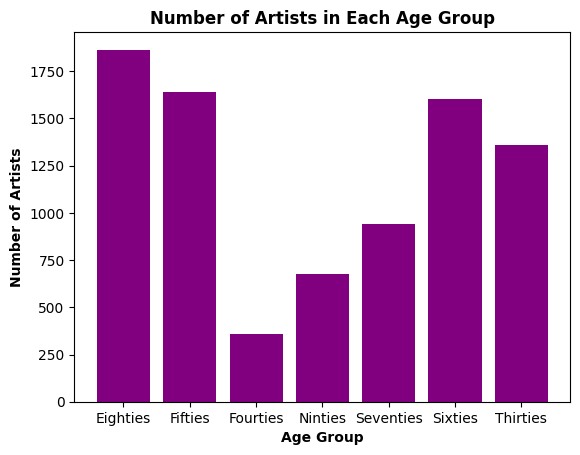

In [ ]:
num_artists_by_age_group = artist_df.groupby('Age_Group').count()['Name']
num_paintings_age_group = artist_df.groupby('Age_Group').sum()['Num_paintings']
plt.bar(num_paintings_age_group.index, num_paintings_age_group.values, color='purple')
plt.title('Number of Artists in Each Age Group', fontweight='bold')
plt.xlabel('Age Group', fontweight='bold')
plt.ylabel('Number of Artists', fontweight='bold')
plt.show()


In [ ]:
artist_df_temp = pd.DataFrame(artist_df.Nationality.str.split(',').tolist(), index=artist_df.Name).stack().reset_index(level=1, drop=True).reset_index(name='Nationality')
artist_df_nationality = pd.merge(artist_df[['Name','Num_paintings']], artist_df_temp, on ='Name', how='left')
paintings_by_nationality = artist_df_nationality.groupby("Nationality")["Num_paintings"].sum()
artist_df_nationality.sample(5)

,Name,Num_paintings,Nationality
49,Joan Miro,102,Spanish
1,Vasiliy Kandinskiy,88,Russian
54,Jackson Pollock,24,American
7,Andrei Rublev,99,Russian
15,Pierre-Auguste Renoir,336,French


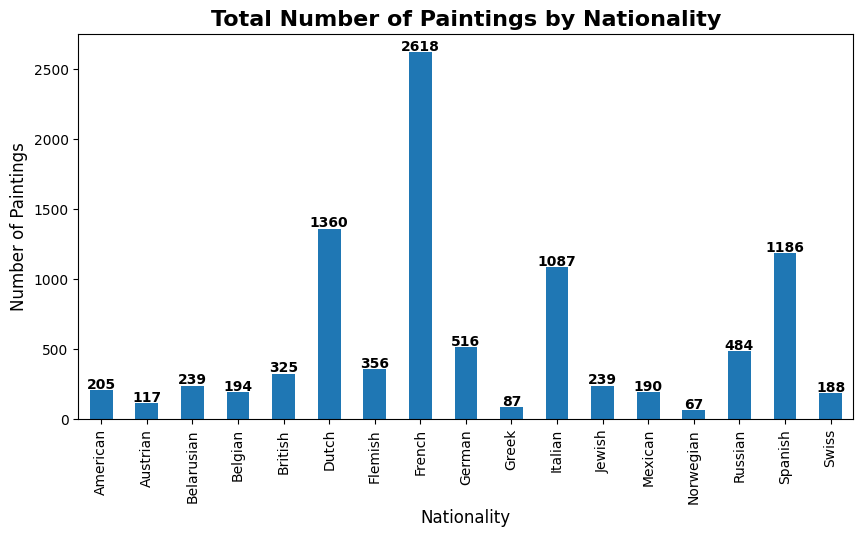

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
paintings_by_nationality.plot(kind="bar")
plt.title("Total Number of Paintings by Nationality",fontweight='bold', fontsize=16)
plt.xlabel("Nationality", fontsize=12)
plt.ylabel("Number of Paintings", fontsize=12)
for i, v in enumerate(paintings_by_nationality.values):
    ax.text(i, v+10, str(v), ha='center', fontweight='bold')
plt.show()

In [ ]:
artist_df_temp = pd.DataFrame(artist_df.Genre.str.split(',').tolist(), index=artist_df.Name).stack().reset_index(level=1, drop=True).reset_index(name='Genre')
artist_df_genre = pd.merge(artist_df[['Name','Num_paintings']], artist_df_temp, on ='Name', how='left')
paintings_by_genre = artist_df_genre.groupby("Genre")["Num_paintings"].sum()
artist_df_genre.sample(5)

,Name,Num_paintings,Genre
6,Rene Magritte,194,Surrealism
61,Michelangelo,49,High Renaissance
9,Edouard Manet,90,Realism
13,Gustav Klimt,117,Symbolism
29,Giotto di Bondone,119,Proto Renaissance


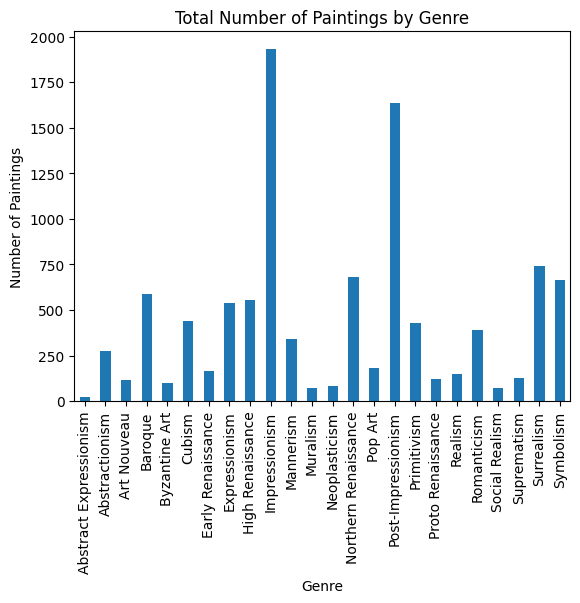

In [ ]:
paintings_by_genre.plot(kind="bar")
plt.title("Total Number of Paintings by Genre")
plt.xlabel("Genre")
plt.ylabel("Number of Paintings")
plt.show()

In [ ]:
nationality_max = artist_df.groupby('Nationality')['Num_paintings'].sum().idxmax()
nationality_min = artist_df.groupby('Nationality')['Num_paintings'].sum().idxmin()
genre_max = artist_df.groupby('Genre')['Num_paintings'].sum().idxmax()
genre_min = artist_df.groupby('Genre')['Num_paintings'].sum().idxmin()
print('Nationality with Maximum Number of Paintings:', nationality_max)
print('Nationality with Minimum Number of Paintings:', nationality_min)
print('Genre with Maximum Number of Paintings:', genre_max)
print('Genre with Minimum Number of Paintings:', genre_min)

Nationality with Maximum Number of Paintings: French
Nationality with Minimum Number of Paintings: British
Genre with Maximum Number of Paintings: Impressionism
Genre with Minimum Number of Paintings: Abstract Expressionism


In [ ]:
corr = artist_df['Age'].corr(artist_df['Num_paintings'])

print("Correlation coefficient between Age and Num_paintings: {:.2f}".format(corr))

Correlation coefficient between Age and Num_paintings: 0.06
